In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-06 10:10:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.01MB/s    in 67s     

2021-06-06 10:11:25 (4.57 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
!pip install split_folders

In [5]:
import os
import shutil
import splitfolders

base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
if ('images_model' in os.listdir(base_dir)):
  shutil.rmtree(os.path.join(base_dir, 'images_model'))

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images/',
                    output ='/tmp/rockpaperscissors/rps-cv-images/images_model',
                    seed=None, ratio=(.8,.2))

# MODEL
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock') 
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')

# TRAIN
train_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/images_model/train/rock') 
train_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/images_model/train/scissors')
train_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/images_model/train/paper')

# VALIDATION
val_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/images_model/val/rock') 
val_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/images_model/val/paper')
val_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/images_model/val/scissors')

Copying files: 2188 files [00:00, 3186.39 files/s]


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_dir = "/tmp/rockpaperscissors/rps-cv-images/images_model/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

val_dir = "/tmp/rockpaperscissors/rps-cv-images/images_model/val"
test_datagen = ImageDataGenerator(
                    rescale = 1./255,
	      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
                    fill_mode = 'nearest')

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [6]:
data_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


data_model.summary()

data_model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = data_model.fit(
    train_generator,
    epochs=20, 
    steps_per_epoch=10,
    validation_data = validation_generator,
    verbose = 1,
    validation_steps=2)

data_model.save("rockpaperscissors.h3")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

Saving v.png to v.png
v.png
[[0. 1. 0.]]
('Riki Abdillah', 'Jakarta Timur')


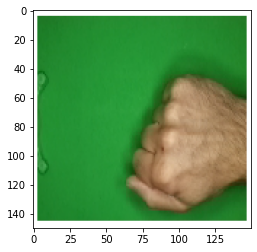

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
uploaded = files.upload()

data_diri =('Riki Abdillah', 'Jakarta Timur')
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = data_model.predict(images, batch_size=10)
 
  print(fn)
  print(classes)
  print(data_diri)